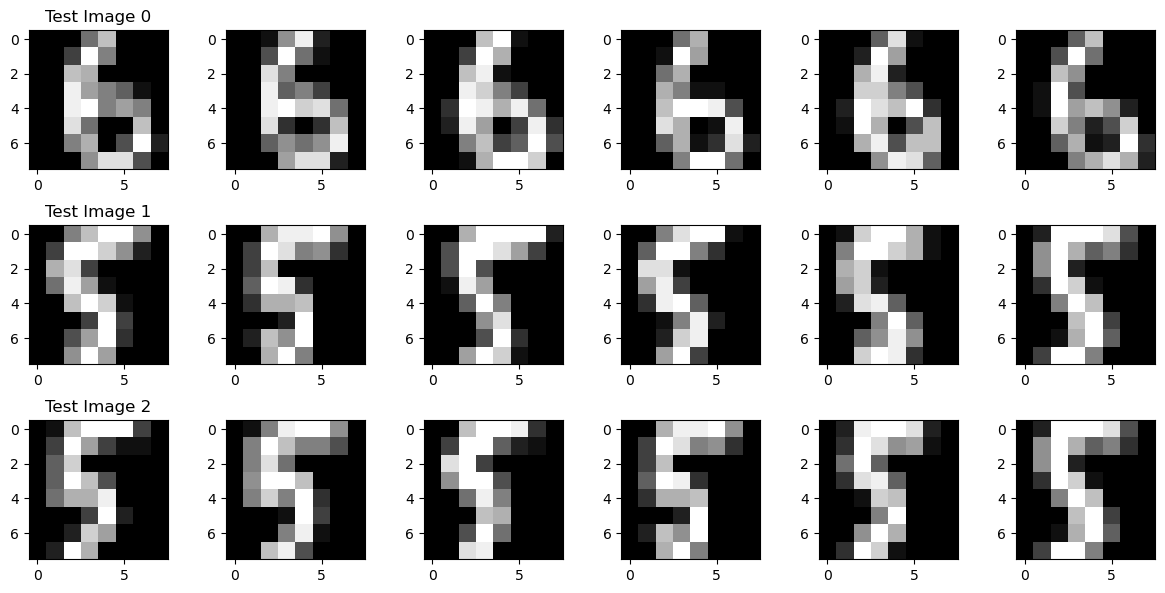

Mean F1 Score (KNN): 0.9626496370410162
Mean F1 Score (Gaussian Naive Bayes): 0.8053770473028571
KNN performed better.


/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Step 1: Loading  the digits  dataset
digits = load_digits()
X, y = digits.data, digits.target

# Step 2: Spliting  the data into training and testing sets as mentioned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a KNN classifier on the training data (set k = 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Selecting test images corresponding to different digits
test_img_indices = [0, 6, 8]
test_images = X_test[test_img_indices]

# Finding the neighbors for each test image
neighborhoods = {}
for i, test_img in enumerate(test_images):
    neighbors_idx = knn_classifier.kneighbors([test_img], return_distance=False)
    neighborhoods[i] = neighbors_idx[0]

# Displaying test images and their neighborhoods
fig, axs = plt.subplots(3, 6, figsize=(12, 6))
for i, (test_img_idx, neighbors) in enumerate(neighborhoods.items()):
    axs[i, 0].imshow(test_images[i].reshape(8, 8), cmap='gray')
    axs[i, 0].set_title(f'Test Image {i}')
    for j, neighbor_idx in enumerate(neighbors):
        axs[i, j+1].imshow(X_train[neighbor_idx].reshape(8, 8), cmap='gray')
plt.tight_layout()
plt.show()

# Step 4: Comparing performance of KNN and Gaussian Naive Bayes classifiers using cross-validation
knn_f1_scores = cross_validate(knn_classifier, X, y, cv=5, scoring='f1_macro')['test_score']
gnb_classifier = GaussianNB()
gnb_f1_scores = cross_validate(gnb_classifier, X, y, cv=5, scoring='f1_macro')['test_score']

# Calculating the  mean F1 scores
mean_knn_f1_score = knn_f1_scores.mean()
mean_gnb_f1_score = gnb_f1_scores.mean()

print("Mean F1 Score (KNN):", mean_knn_f1_score)
print("Mean F1 Score (Gaussian Naive Bayes):", mean_gnb_f1_score)

# Compare performance between 2 given methods
if mean_knn_f1_score > mean_gnb_f1_score:
    print("KNN performed better.")
else:
    print("Gaussian Naive Bayes performed better.")


1. we need to import the libraries as 
2. then we need to split the data
3. fitting a KNN classifier based on the split 80-20
4.Select at least 3 different images corresponding to 3 different digits from the test data 
5.Displaying test images and their neighborhoods
6.Comparing performance of KNN and Gaussian Naive Bayes classifiers using cross-validation and F1 score
7.Comparing performance between 2 given methods